In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [42]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Property_Area', 'Married', 'Gender', 'Education']
loan_10 = loan[tree_loan_cols]
loan_10 = loan_10.iloc[:30, :]
loan_10_y = loan.loc[:29, 'Loan_Status']
x = pd.get_dummies(loan_10)
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(x, loan_10_y)
pred = clf.predict(x)
print(pred)
print("Accuracy score: ", accuracy_score(loan_10_y, pred))

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y']
Accuracy score:  0.8666666666666667


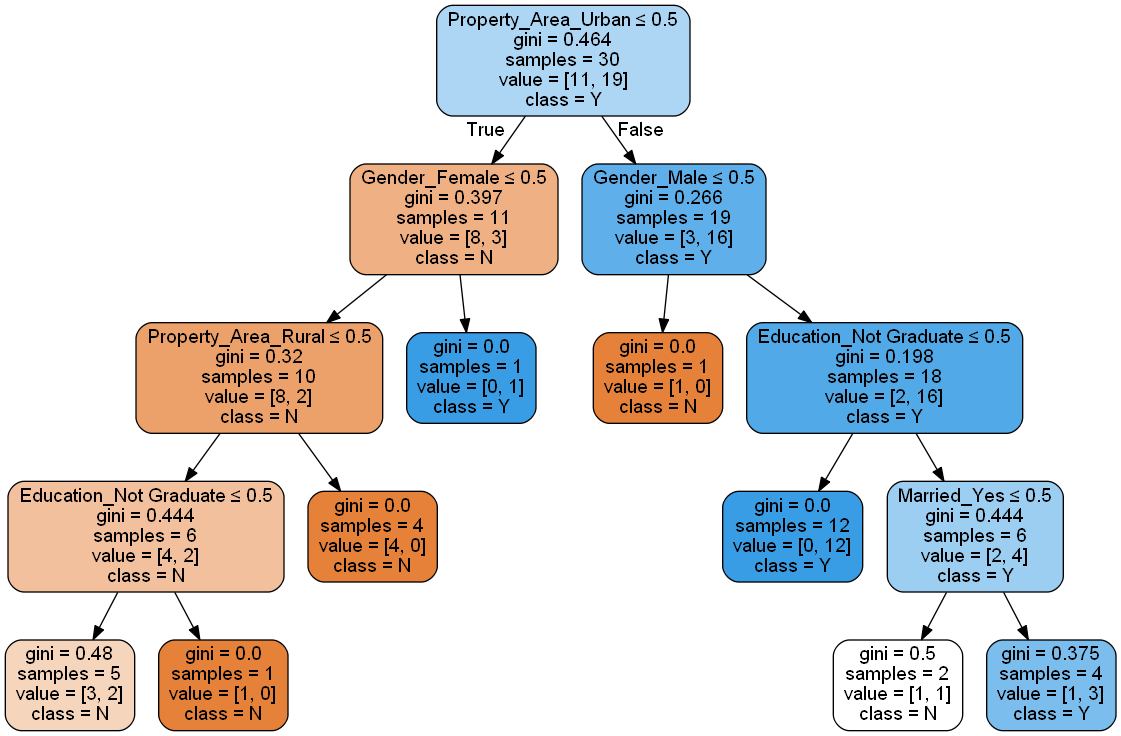

In [41]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns ,class_names=['N','Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("loan_tree2.png")
Image(graph.create_png())

In [98]:
print("Property_Area_Urban<=0.5: ", np.sum(x.Property_Area_Urban<=0.5))
print("Property_Area_Urban<=0.5, Y: ", np.sum(np.logical_and(x.Property_Area_Urban<=0.5,  loan_10_y=='Y') == True))
print("Property_Area_Urban<=0.5, N: ", np.sum(np.logical_and(x.Property_Area_Urban<=0.5,  loan_10_y=='N') == True))

print("Property_Area_Urban>0.5: ", np.sum(x.Property_Area_Urban>0.5))
print("Property_Area_Urban>0.5, Y: ", np.sum(np.logical_and(x.Property_Area_Urban>0.5,  loan_10_y=='Y') == True))
print("Property_Area_Urban>0.5, N: ", np.sum(np.logical_and(x.Property_Area_Urban>0.5,  loan_10_y=='N') == True))


print("Property_Area_Urban<=0.5, Gender_Female<=0.5, Y:", np.sum(np.logical_and(np.logical_and(x.Property_Area_Urban<=0.5, x.Gender_Female<=0.5),  loan_10_y=='Y') == True))
print("Property_Area_Urban<=0.5, Gender_Female<=0.5,  N:", np.sum(np.logical_and(np.logical_and(x.Property_Area_Urban<=0.5, x.Gender_Female<=0.5),  loan_10_y=='N') == True))
print("Property_Area_Urban<=0.5, Gender_Female>0.5,  Y:",  np.sum(np.logical_and(np.logical_and(x.Property_Area_Urban<=0.5, x.Gender_Female>0.5),  loan_10_y=='Y') == True))
print("Property_Area_Urban<=0.5, Gender_Female>0.5, N:", np.sum(np.logical_and(np.logical_and(x.Property_Area_Urban<=0.5, x.Gender_Female>0.5),  loan_10_y=='N') == True))



Property_Area_Urban<=0.5:  11
Property_Area_Urban<=0.5, Y:  3
Property_Area_Urban<=0.5, N:  8
Property_Area_Urban>0.5:  19
Property_Area_Urban>0.5, Y:  16
Property_Area_Urban>0.5, N:  3
Property_Area_Urban<=0.5, Gender_Female<=0.5, Y: 2
Property_Area_Urban<=0.5, Gender_Female<=0.5,  N: 8
Property_Area_Urban<=0.5, Gender_Female>0.5,  Y: 1
Property_Area_Urban<=0.5, Gender_Female>0.5, N: 0


In [99]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [102]:
clf.score(x, loan_10_y)

0.8666666666666667

    RANDOM FOREST

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=6, criterion='entropy') #max_features=none,log2,auto
rf.fit(x, loan_10_y)
pred_rf = rf.predict(x)
print("RF Accuracy score: ", accuracy_score(loan_10_y, pred_rf))
print(rf.feature_importances_)

RF Accuracy score:  0.8666666666666667
[0.17824591 0.12367473 0.27038057 0.05602783 0.05751364 0.06735685
 0.08171838 0.08968092 0.07540116]


In [111]:
from sklearn.datasets import make_classification
X_r, y_r = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_r

array([[-1.66853167, -1.29901346,  0.2746472 , -0.60362044],
       [-2.9728827 , -1.08878294,  0.70885958,  0.42281857],
       [-0.59614125, -1.37007001, -3.11685659,  0.64445203],
       ...,
       [ 0.91711204,  1.10596645,  0.86766522, -2.25625012],
       [ 0.10027664,  1.45875846, -0.44360274, -0.67002328],
       [ 1.0415229 , -0.01987143,  0.15216419, -1.9405334 ]])